## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ

Using TensorFlow backend.


In [2]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255. #變成0~1之間
    x = 2*x - 1 #變成-1~1之間
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
#確認轉換過後的最大值是+1 最小值是-1
print('max=', np.max(x_train[0:]))
print('min=', np.min(x_train[0:]))

max= 1.0
min= -1.0


In [7]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

num_neurons = [256, 256, 256, 128, 128, 128, 32]
model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               1651

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 62us/step - loss: 1.7284 - accuracy: 0.3778 - val_loss: 1.5569 - val_accuracy: 0.4432
Epoch 2/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4918 - accuracy: 0.4712 - val_loss: 1.4784 - val_accuracy: 0.4838
Epoch 3/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.3686 - accuracy: 0.5162 - val_loss: 1.4092 - val_accuracy: 0.5029
Epoch 4/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.2779 - accuracy: 0.5491 - val_loss: 1.3763 - val_accuracy: 0.5175
Epoch 5/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.1920 - accuracy: 0.5779 - val_loss: 1.3491 - val_accuracy: 0.5332
Epoch 6/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.1188 - accuracy: 0.6046 - val_loss: 1.3579 - val_accuracy: 0.5272
Epoch 7/100
50000/50000 [==============================] - 3s

50000/50000 [==============================] - 3s 52us/step - loss: 0.1161 - accuracy: 0.9616 - val_loss: 3.2981 - val_accuracy: 0.5275
Epoch 55/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.1128 - accuracy: 0.9625 - val_loss: 3.4056 - val_accuracy: 0.5330
Epoch 56/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.1162 - accuracy: 0.9609 - val_loss: 3.5591 - val_accuracy: 0.5324
Epoch 57/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.1174 - accuracy: 0.9612 - val_loss: 3.5738 - val_accuracy: 0.5225
Epoch 58/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.1020 - accuracy: 0.9667 - val_loss: 3.5123 - val_accuracy: 0.5290 1s - los - ETA: 0s - loss: 0.1016 - 
Epoch 59/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.1128 - accuracy: 0.9636 - val_loss: 3.3837 - val_accuracy: 0.5211
Epoch 60/100
50000/50000 [==============================] - 3s 52us/step - loss: 0

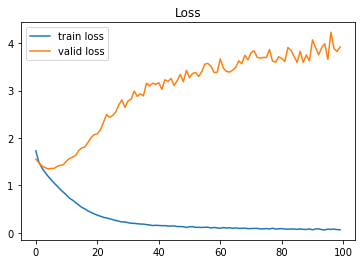

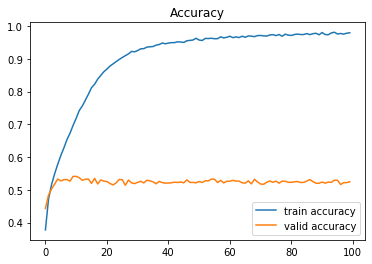

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()